In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.preprocessing
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [3]:
#load the first sheet "Transaction sheet" into transaction_df
transcation_df = pd.read_excel("../Raw_data.xlsx",sheet_name=0)

In [4]:
#view the first 5 rows
transcation_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [5]:
#shape of dataframe
print(f"Total Records(rows) in the Transactions dataset: {transcation_df.shape[0]}")
print(f"Total Features(columns) in the Transactions dataset: {transcation_df.shape[1]}")

Total Records(rows) in the Transactions dataset: 20000
Total Features(columns) in the Transactions dataset: 13


In [6]:
#Getting to know about the feature.
transcation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [7]:
#null values count
transcation_df.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [8]:
#null value percentage
transcation_df.isnull().sum()/len(transcation_df)*100

transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64

In [9]:
#check for duplicated records
transcation_df.duplicated().sum()

0

In [10]:
#numeric dtype columns
numeric_columns = transcation_df.select_dtypes([np.number]).columns.to_list()
print(f"The numeric columns are:\n{numeric_columns}")

The numeric columns are:
['transaction_id', 'product_id', 'customer_id', 'online_order', 'list_price', 'standard_cost', 'product_first_sold_date']


In [11]:
#non-numeric dtype columns
numeric_columns = transcation_df.select_dtypes(exclude=[np.number]).columns.to_list()
print(f"The non-numeric columns are:\n{numeric_columns}")

The non-numeric columns are:
['transaction_date', 'order_status', 'brand', 'product_line', 'product_class', 'product_size']


1 -> Filling the missing values of each feature(column)

In [12]:
#1.1 there are 1.80% data missing in the online_order feature.
print(transcation_df["online_order"].value_counts())

online_order
1.0    9829
0.0    9811
Name: count, dtype: int64


In [13]:
#since the columns is categorical we can implement mode imputation
online_order_mode = transcation_df["online_order"].mode()

#since 1 is the most frequent occuring category fill "NAN" with 1
transcation_df["online_order"] = transcation_df["online_order"].fillna(online_order_mode.iloc[0])

In [14]:
#1.2 cross check for missing values
transcation_df["online_order"].isnull().sum()

0

In [15]:
#Brand, Product Line, Product Class, Product Size, Standard Cost, Product First Sold Date columns have missing values of 0.985%
transcation_df[transcation_df["brand"].isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
136,137,0,431,2017-09-23,0.0,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaN
159,160,0,3300,2017-08-27,0.0,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaN
366,367,0,1614,2017-03-10,0.0,Approved,NaN,NaN,NaN,NaN,850.89,NaN,NaN
406,407,0,2559,2017-06-14,1.0,Approved,NaN,NaN,NaN,NaN,710.59,NaN,NaN
676,677,0,2609,2017-07-02,0.0,Approved,NaN,NaN,NaN,NaN,1972.01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19340,19341,0,443,2017-12-26,1.0,Approved,NaN,NaN,NaN,NaN,744.54,NaN,NaN
19383,19384,0,2407,2017-06-11,0.0,Approved,NaN,NaN,NaN,NaN,1098.18,NaN,NaN
19793,19794,0,2860,2017-01-13,0.0,Approved,NaN,NaN,NaN,NaN,868.56,NaN,NaN
19859,19860,0,2468,2017-06-24,1.0,Approved,NaN,NaN,NaN,NaN,1497.43,NaN,NaN


In [16]:
#since the all the columns above mentioned are null so forthe we can remove the index or row of the null values containing columns
rows_to_remove = transcation_df[transcation_df["brand"].isnull()].index
transcation_df.drop(index=rows_to_remove,inplace=True)

In [17]:
rows_to_remove

Index([  136,   159,   366,   406,   676,   780,  1003,  1130,  1196,  1282,
       ...
       19045, 19132, 19176, 19196, 19205, 19340, 19383, 19793, 19859, 19871],
      dtype='int64', length=197)

In [18]:
#cross the for null values
transcation_df.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

Missing values are handled

2 -> consistency Check

In [19]:
#2.1 product_id
transcation_df["product_id"].value_counts().sort_values()

product_id
47      121
100     130
8       136
16      136
71      137
       ... 
38      267
35      268
1       311
3       354
0      1181
Name: count, Length: 101, dtype: int64

In [20]:
#2.2 online_order
transcation_df["online_order"].value_counts()

online_order
1.0    10097
0.0     9706
Name: count, dtype: int64

In [21]:
#2.3 Order_status
transcation_df["order_status"].value_counts()

order_status
Approved     19625
Cancelled      178
Name: count, dtype: int64

In [22]:
#2.4 brand
transcation_df["brand"].value_counts()

brand
Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: count, dtype: int64

In [23]:
#2.4 product_line
transcation_df["product_line"].value_counts()

product_line
Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: count, dtype: int64

In [24]:
#2.5 product_class
transcation_df["product_class"].value_counts()

product_class
medium    13826
high       3013
low        2964
Name: count, dtype: int64

In [25]:
#2.6 product_size
transcation_df["product_size"].value_counts()

product_size
medium    12990
large      3976
small      2837
Name: count, dtype: int64

There are no inconsistent data present in the dataset

3 -> Check for ouliers in the dataset

In [26]:
#3.1 list_price
transcation_df["list_price"].describe()

count    19803.000000
mean      1107.997866
std        582.770460
min         12.010000
25%        575.270000
50%       1163.890000
75%       1635.300000
max       2091.470000
Name: list_price, dtype: float64

Text(0.5, 1.0, 'Price_List Box plot')

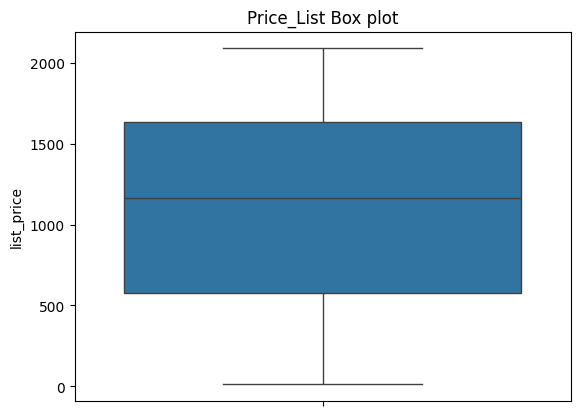

In [27]:
ax = plt.subplot()
sns.boxplot(data=transcation_df,y="list_price",ax=ax)
plt.title("Price_List Box plot")

There exist no outliers

In [28]:
#3.2 standard_cost
transcation_df["standard_cost"].describe()

count    19803.000000
mean       556.046951
std        405.955660
min          7.210000
25%        215.140000
50%        507.580000
75%        795.100000
max       1759.850000
Name: standard_cost, dtype: float64

Text(0.5, 1.0, 'standard_cost Box plot')

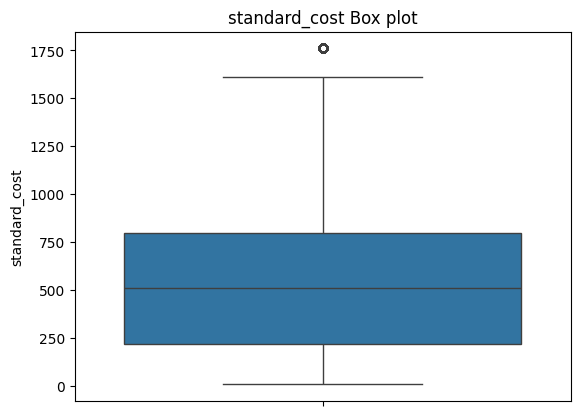

In [29]:
ax = plt.subplot()
sns.boxplot(data=transcation_df,y="standard_cost",ax=ax)
plt.title("standard_cost Box plot")

In [30]:
outlier_rows_sc = transcation_df[transcation_df["standard_cost"]>1670].index
outlier_rows_sc

Index([   59,   142,   291,   412,   698,   755,   790,   905,   985,   995,
       ...
       18799, 18805, 18852, 18890, 19090, 19190, 19551, 19705, 19722, 19749],
      dtype='int64', length=195)

there exist an outlier in the standard_cost feature with outlier value of being 1670 and above

In [31]:
#3.3 product_first_sold_date
transcation_df["product_first_sold_date"].describe()

count    19803.000000
mean     38199.776549
std       2875.201110
min      33259.000000
25%      35667.000000
50%      38216.000000
75%      40672.000000
max      42710.000000
Name: product_first_sold_date, dtype: float64

Text(0.5, 1.0, 'product_first_sold_date Box plot')

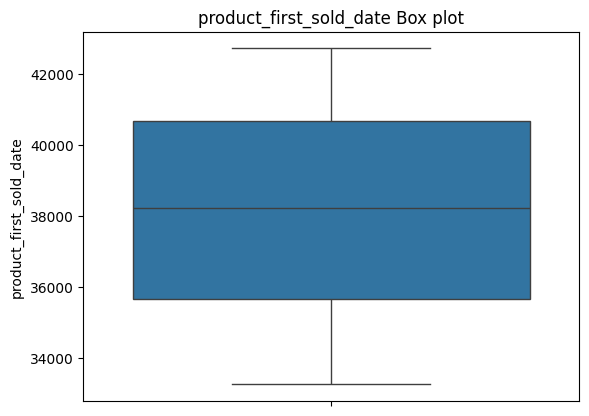

In [32]:
ax = plt.subplot()
sns.boxplot(data=transcation_df,y="product_first_sold_date",ax=ax)
plt.title("product_first_sold_date Box plot")

there exist no outliers

In [39]:
#since the data is cleaned we can save the dataset in csv format
transcation_df.to_csv("cleaned_transaction.csv",index=False)